In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()

## Feature details

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population


In [3]:
df_boston=pd.DataFrame(boston.data,columns=boston.feature_names)

In [4]:
df_boston['MEDV']=pd.DataFrame(boston.target)


In [5]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### ZN (proportion of residential land zoned for lots over 25,000 sq.ft.) with 0 for 25th, 50th percentiles. Second, CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise) with 0 for 25th, 50th and 75th percentiles. These summeries are understandable as both variables are conditional + categorical variables

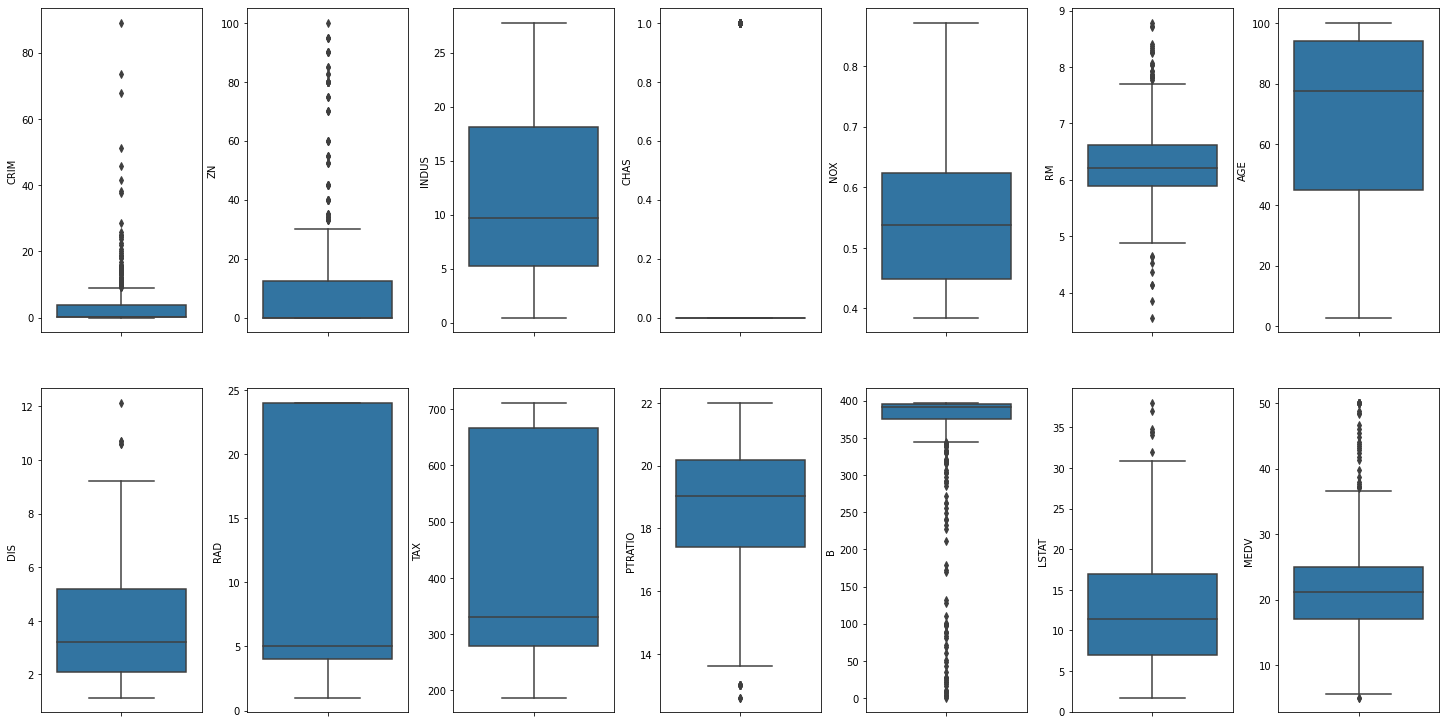

In [8]:
## Checking outliers
import seaborn as sns
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_boston.items():
    sns.boxplot(y=k, data=df_boston, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#### Columns like CRIM, ZN, RM, B,LSTAT,MEDV,DIS seems to have outliers. Let's see the outliers percentage in every column.

In [9]:
for k, v in df_boston.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df_boston)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))
    

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


#### Let's remove MEDV outliers (MEDV = 50.0) before plotting more distributions

In [10]:
upper_bound=df_boston.MEDV.mean()+3*np.std(df_boston.MEDV)
upper_bound

50.09684095994531

In [11]:
df_boston=df_boston[~(df_boston['MEDV'] >= 50.0)]
print(np.shape(df_boston))

(490, 14)


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


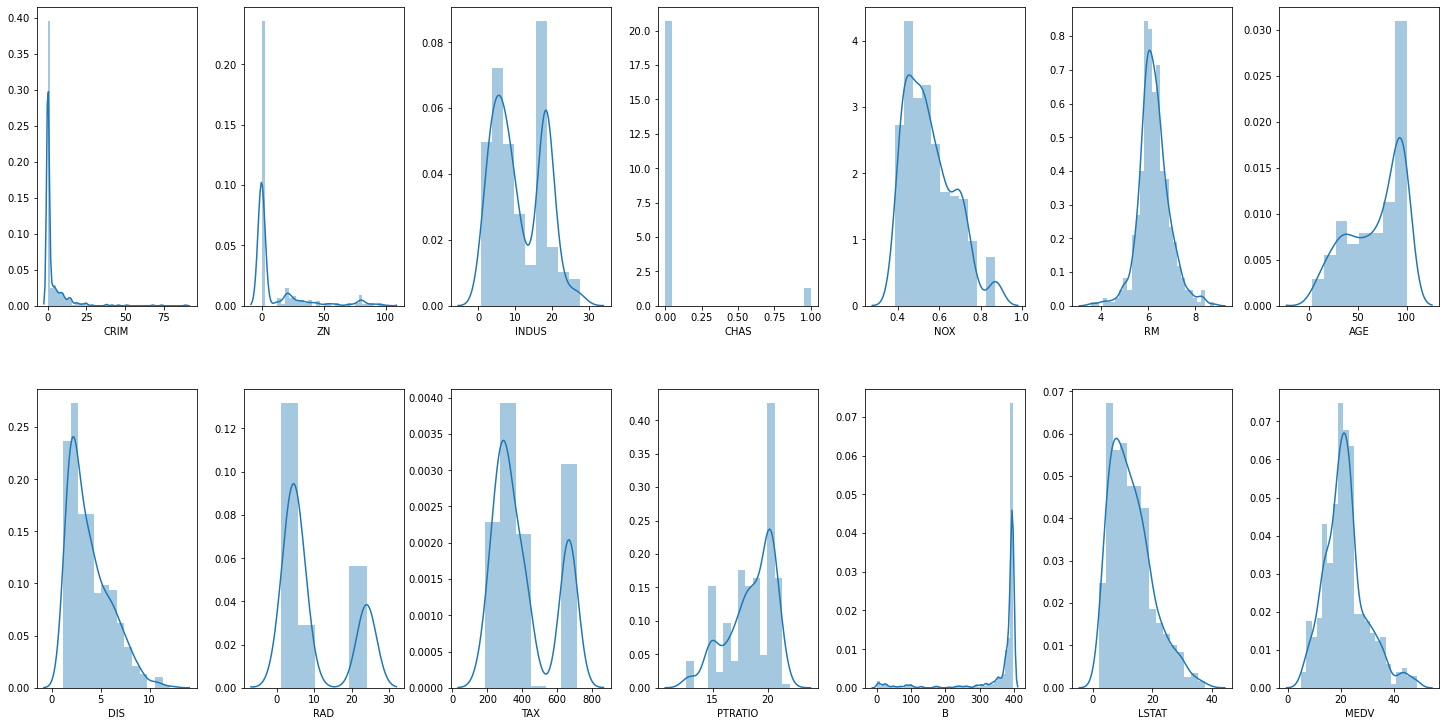

In [12]:
## Plotting all distributions 
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_boston.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### The histogram also shows that columns CRIM, ZN, B has highly skewed distributions.

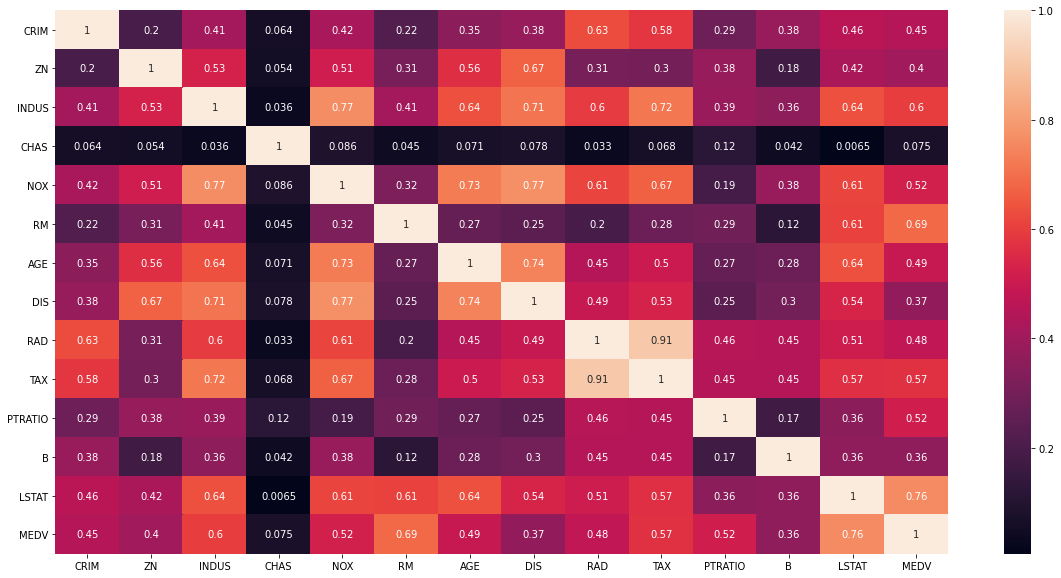

In [13]:
## Now let's plot the pairwise correlation on data.
plt.figure(figsize=(20, 10))
sns.heatmap(df_boston.corr().abs(),  annot=True)

### From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors. Let's plot these columns against MEDV.

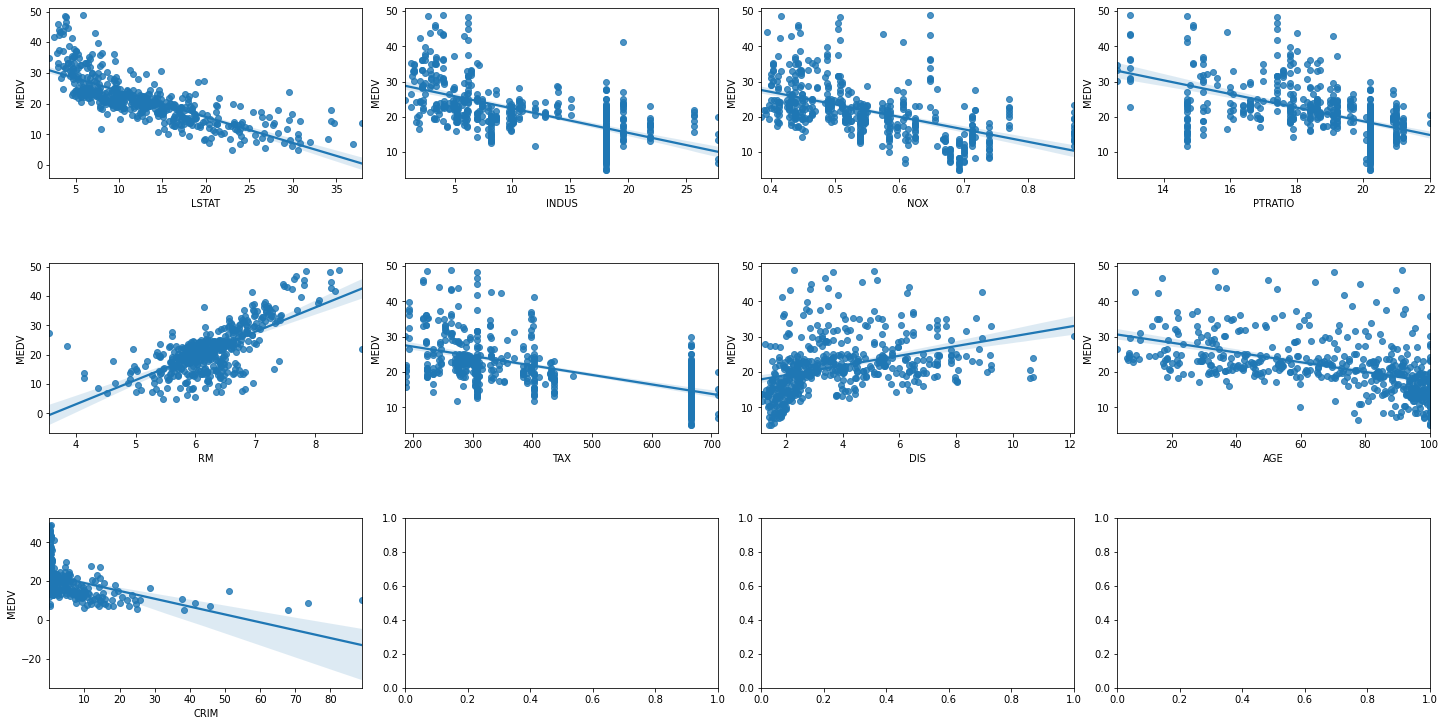

In [14]:
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE','CRIM']
X1 = df_boston.loc[:,column_sels]
y1 = df_boston['MEDV']
#X1 = pd.DataFrame(data=min_max_scaler.fit_transform(X), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y1, x=X1[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


#### So with these analsis, we may try predict MEDV with 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE','CRIM' features.(CHAS, ZN and RAD are removed). Let's try to remove the skewness of the data trough log transformation.

In [15]:
#columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']
for col in df_boston.columns:
    if np.abs(df_boston[col].skew()) > 0.3:
        df_boston[col] = np.log1p(df_boston[col])

In [16]:
## The Outliers became redused
for k, v in df_boston.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df_boston)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))
    

Column CRIM outliers = 1.22%
Column ZN outliers = 0.00%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 4.69%
Column AGE outliers = 3.27%
Column DIS outliers = 0.00%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.65%
Column B outliers = 15.92%
Column LSTAT outliers = 0.00%
Column MEDV outliers = 5.92%


In [17]:
### Standard normal Scaling have to do
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled=scaler.fit_transform(df_boston)
data=pd.DataFrame(data_scaled,columns=df_boston.columns)

In [18]:
## Splitting dataset into dependent and independent Variable
cols=['LSTAT','INDUS','NOX','PTRATIO','RM','TAX','DIS','AGE','CRIM']
X=df_boston.loc[:,cols]
y=df_boston['MEDV']

In [19]:
X.head()

,LSTAT,INDUS,NOX,PTRATIO,RM,TAX,DIS,AGE,CRIM
0,1.788421,1.196948,0.430483,2.791165,6.575,5.693732,1.627278,4.192680,0.006300
1,2.316488,2.088153,0.384582,2.933857,6.421,5.493061,1.786261,4.380776,0.026944
2,1.615420,2.088153,0.384582,2.933857,7.185,5.493061,1.786261,4.128746,0.026924
3,1.371181,1.156881,0.377066,2.980619,6.998,5.407172,1.954757,3.845883,0.031857
4,1.845300,1.156881,0.377066,2.980619,7.147,5.407172,1.954757,4.010963,0.066770


In [20]:
y.head()

0    3.218876
1    3.117950
2    3.575151
3    3.538057
4    3.616309
Name: MEDV, dtype: float64

In [21]:
## Dividing dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.2,random_state=0)

In [22]:
print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))


How many samples do we have in our test and train datasets?
X_train:  (392, 9)
y_train:  (392,)
X_test:  (98, 9)
y_test:  (98,)


In [23]:
## Applying Linear Regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [24]:
print(regressor.coef_),print(regressor.intercept_)

[-0.38179383  0.00186671 -0.48901623 -0.46052188  0.07474981 -0.03501508
 -0.13278218  0.02517486 -0.09145193]
5.493652340611904


(None, None)

In [25]:
## Find the r2 value of the regression
from sklearn.metrics import mean_squared_error, r2_score
y_predict_train=regressor.predict(X_train)
train_scores=r2_score(y_train,y_predict_train)
y_predict_test=regressor.predict(X_test)
test_scores=r2_score(y_test,y_predict_test)
mse=mean_squared_error(y_test,y_predict_test)
rmse=np.sqrt(mse)
print(" r2 Value of training data-- :",   train_scores)
print(" r2 Value of test data----:",   test_scores)
print(" MSE Score------------ :",   mse)
print(" RMSE Score----------- :",   rmse)

 r2 Value of training data-- : 0.7588976250564878
 r2 Value of test data----: 0.7978012452456441
 MSE Score------------ : 0.027287330848611086
 RMSE Score----------- : 0.16518877337340782


##### Using better evaluation technique - Cross Validation

In [50]:
## Applying Cross Validation
from sklearn.model_selection import cross_val_score
reg=LinearRegression()
r2_score=cross_val_score(reg,X,y,scoring='r2',cv=5)
mse_score=cross_val_score(reg,X,y,scoring='neg_mean_squared_error',cv=5)
print("Cross Value r2 Score-------:",np.mean(r2_score))
print("Cross Value neg MSE Score--- :",np.mean(mse_score))

Cross Value r2 Score-------: 0.6002602161949143
Cross Value neg MSE Score--- : -0.037115349313670984


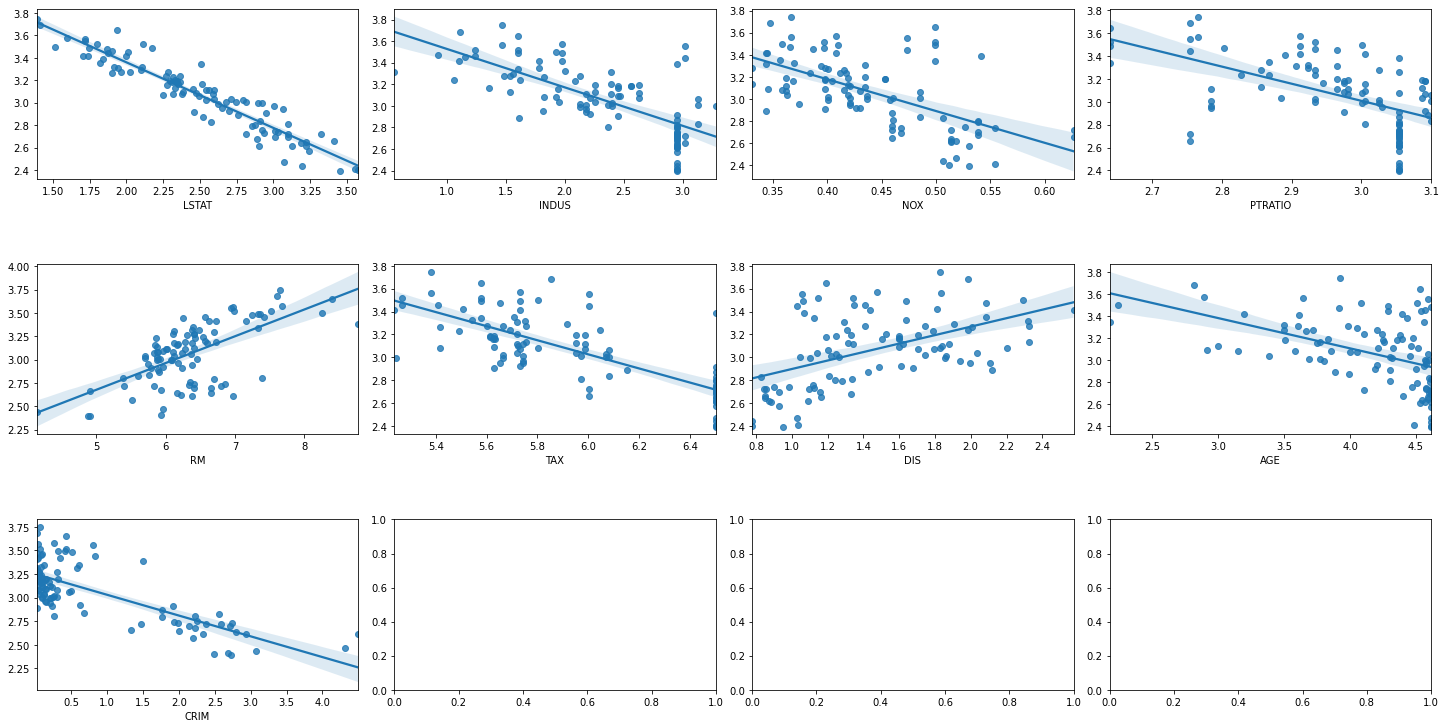

In [27]:
## Plotting the distribution of y_predict and X_test

column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE','CRIM']
X1 = X_test
y1 =y_predict_test
#X1 = pd.DataFrame(data=min_max_scaler.fit_transform(X), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y1, x=X1[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


In [28]:
## Taking the OLS summary of the model
import statsmodels.api as sm
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     133.6
Date:                Mon, 14 Dec 2020   Prob (F-statistic):          3.31e-112
Time:                        04:32:52   Log-Likelihood:                 124.55
No. Observations:                 392   AIC:                            -229.1
Df Residuals:                     382   BIC:                            -189.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4937      0.408     13.472      0.000       4.692       6.295
LSTAT         -0.3818      0.033    -11.621      0.000      -0.446      -0.317
INDUS          0.0019      0.026      0.071      0.944      -0.050       0.054
NOX           -0.4890      0.271     -1.801      0.072      -1.023       0.045
PTRATIO       -0.4605      0.095     -4.850      0.000      -0.647      -0.274
RM             0.0747      0.020      3.741      0.000       0.035       0.114
TAX           -0.0350      0.043     -0.816      0.415      -0.119       0.049
DIS           -0.1328      0.047     -2.796      0.005      -0.226      -0.039
AGE            0.0252      0.023      1.085      0.279      -0.020       0.071
CRIM          -0.0915      0.018     -5.218      0.000      -0.126      -0.057
==============================================================================
Omnibus:                       29.702   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.446
Skew:                          -0.256   Prob(JB):                     8.42e-21
Kurtosis:                       5.323   Cond. No.                         516.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
### Splitting dataset into dependent and independent Variable
colls=['LSTAT','PTRATIO','RM','CRIM']
X=df_boston.loc[:,colls]
y=df_boston['MEDV']

In [39]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.2,random_state=1)

In [40]:
## Applying Linear Regression
from sklearn.linear_model import LinearRegression
regressor_c=LinearRegression()
regressor_c.fit(X_train,y_train)

LinearRegression()

In [52]:
r2_score_=cross_val_score(reg,X,y,scoring='r2',cv=5)
mse_score_=cross_val_score(reg,X,y,scoring='neg_mean_squared_error',cv=5)
print(np.mean(r2_score_)),print(np.mean(mse_score_))

0.6002602161949143
-0.037115349313670984


(None, None)

In [41]:
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     300.2
Date:                Mon, 14 Dec 2020   Prob (F-statistic):          3.42e-117
Time:                        04:44:10   Log-Likelihood:                 110.22
No. Observations:                 392   AIC:                            -210.4
Df Residuals:                     387   BIC:                            -190.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9485      0.322     15.382      0.000       4.316       5.581
LSTAT         -0.3403      0.028    -12.285      0.000      -0.395      -0.286
PTRATIO       -0.5175      0.091     -5.693      0.000      -0.696      -0.339
RM             0.0924      0.019      4.894      0.000       0.055       0.130
CRIM          -0.0963      0.012     -8.247      0.000      -0.119      -0.073
==============================================================================
Omnibus:                       25.736   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.365
Skew:                           0.017   Prob(JB):                     2.38e-20
Kurtosis:                       5.352   Cond. No.                         267.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""